im070_sat_1_selected.fits :


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in log10


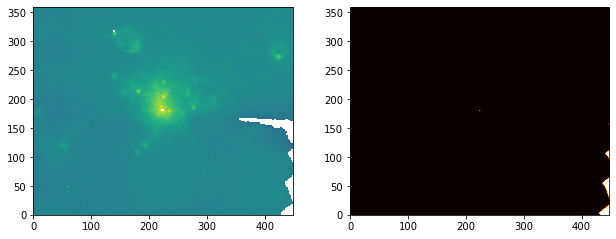

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in log10
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in log10
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in log10


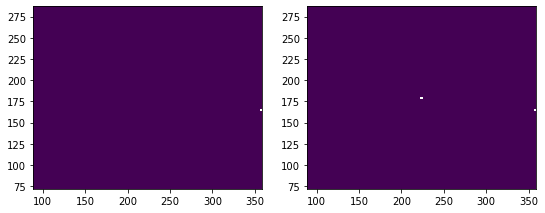

im070_sat_2_selected.fits :


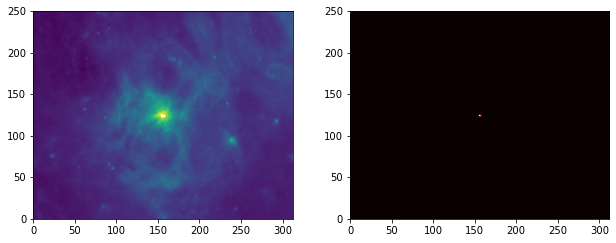

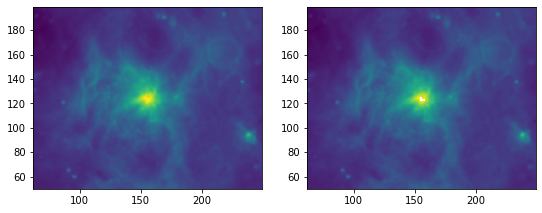

im070_sat_3_selected.fits :


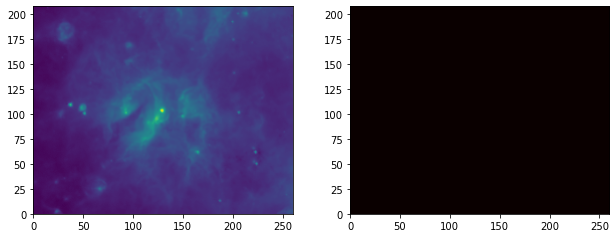

im070_sat_4_selected.fits :


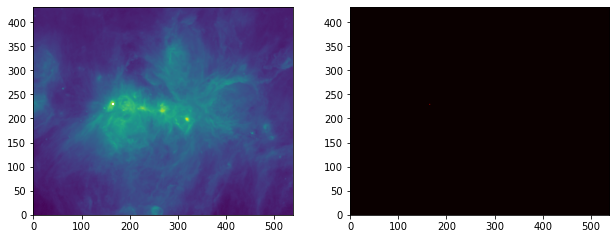

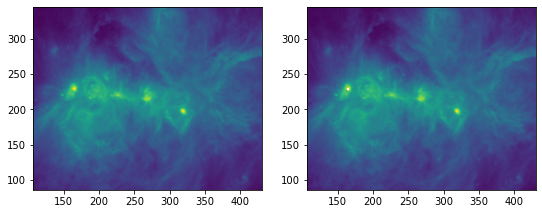

im070_sat_5_selected.fits :


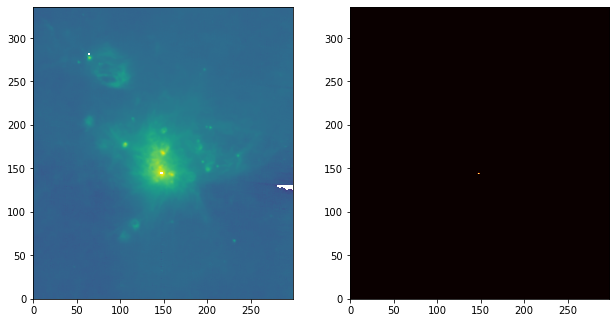

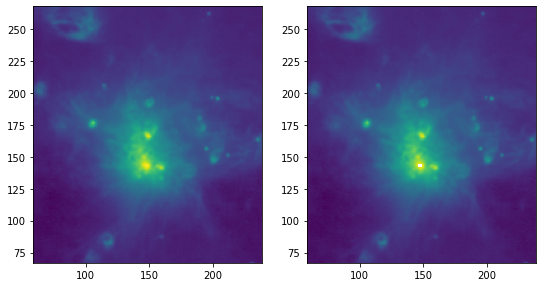

im070_sat_6_selected.fits :


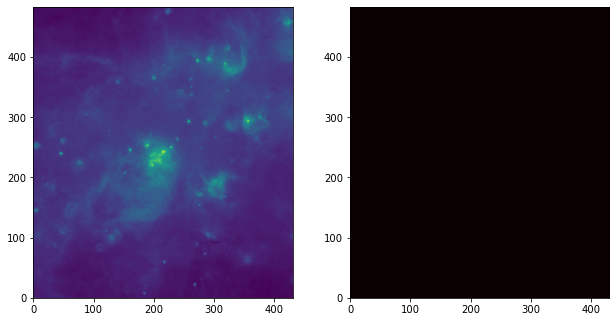

im070_sat_7_selected.fits :


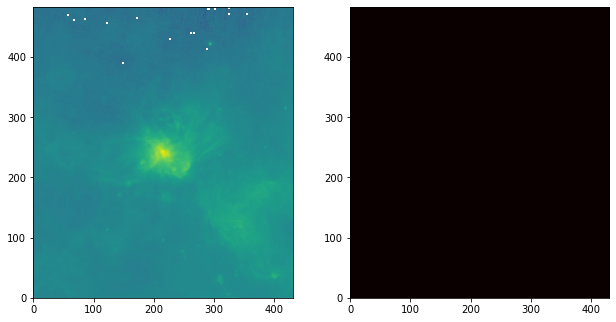

im070_sat_8_selected.fits :


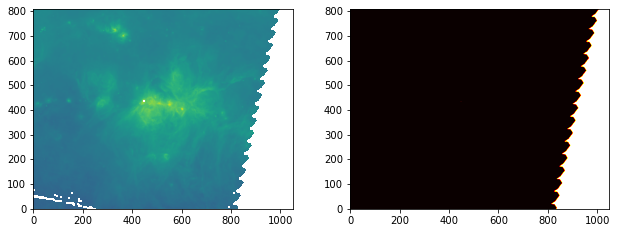

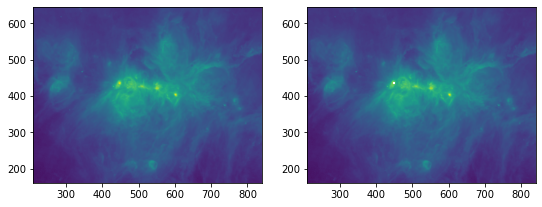

im160_sat_1_selected.fits :


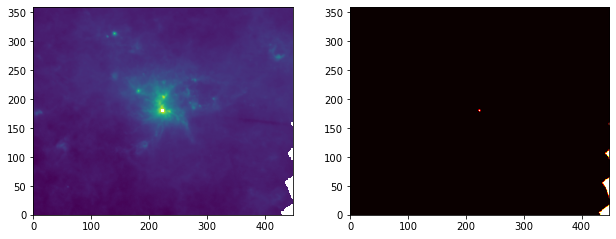

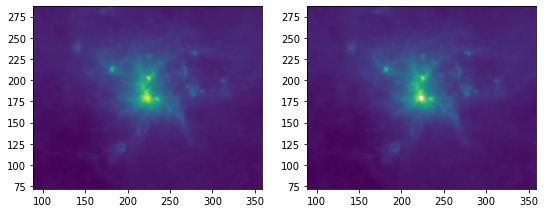

im160_sat_2_selected.fits :


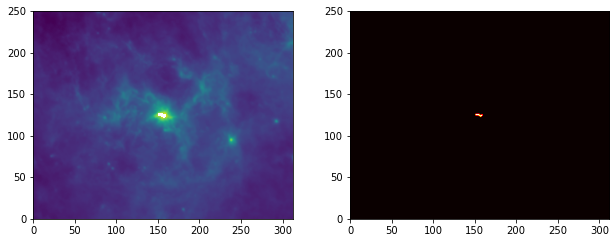

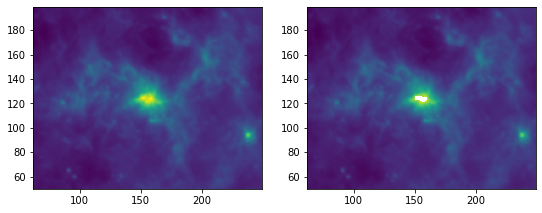

im160_sat_3_selected.fits :


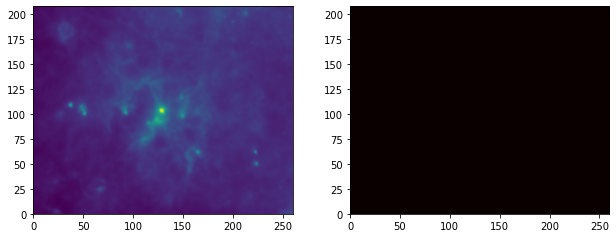

im160_sat_4_selected.fits :


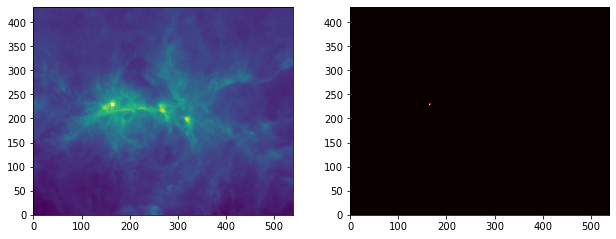

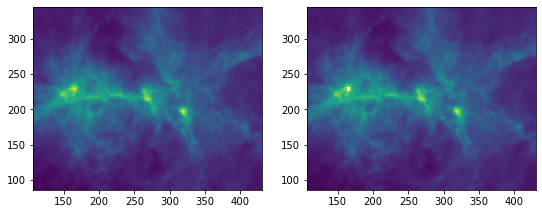

im160_sat_5_selected.fits :


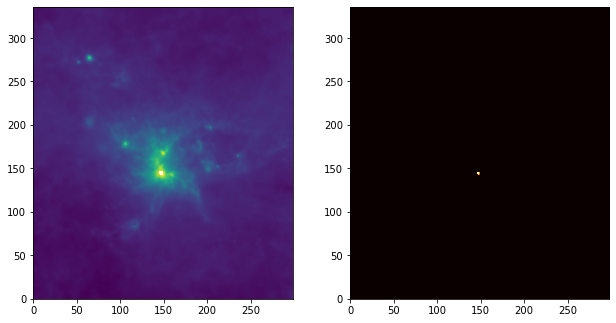

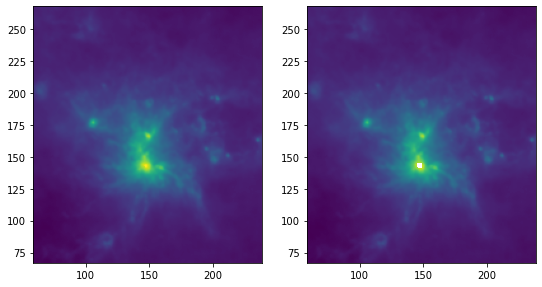

im160_sat_6_selected.fits :


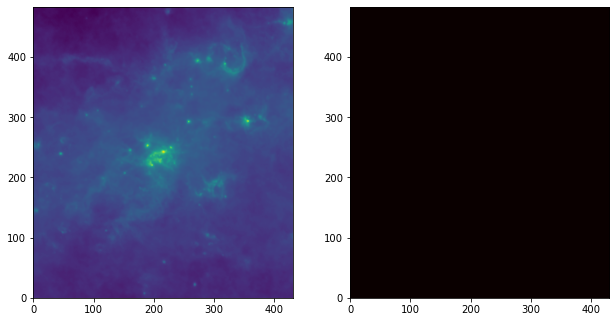

im160_sat_7_selected.fits :


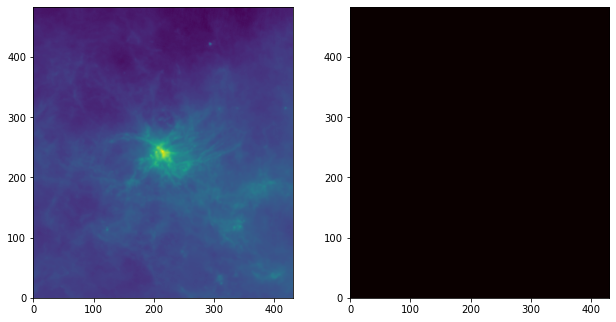

im160_sat_8_selected.fits :


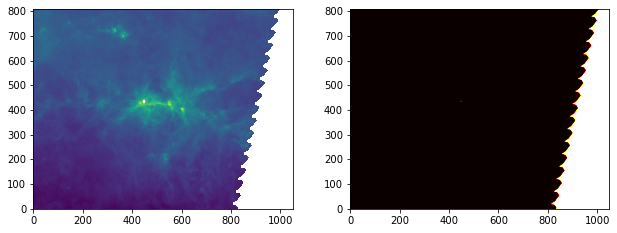

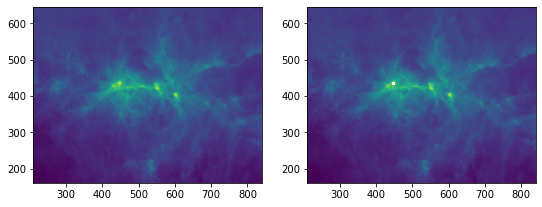

im250_sat_1_selected.fits :


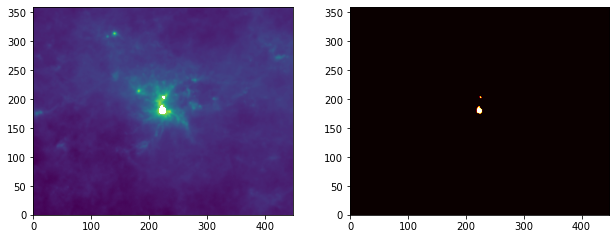

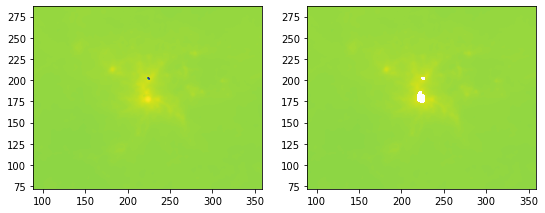

im250_sat_2_selected.fits :


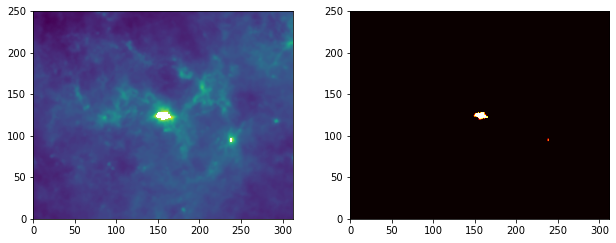

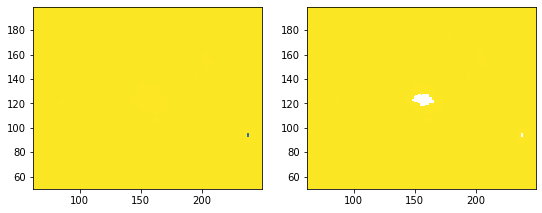

im250_sat_3_selected.fits :


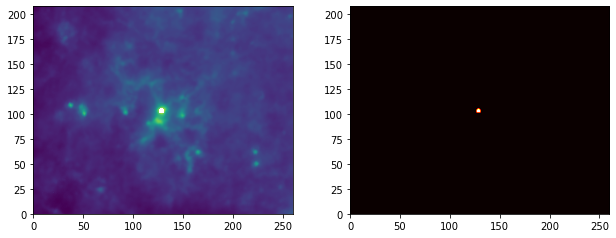

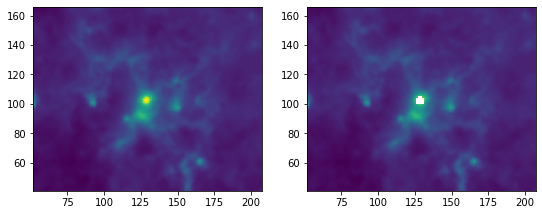

im250_sat_4_selected.fits :


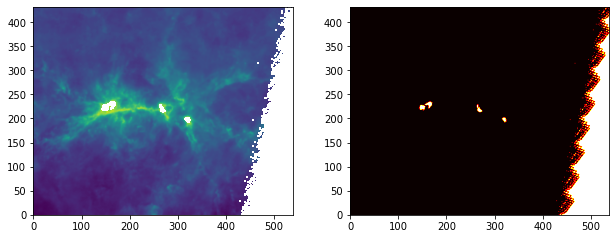

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in log10


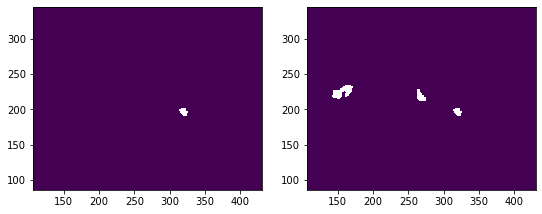

im250_sat_5_selected.fits :


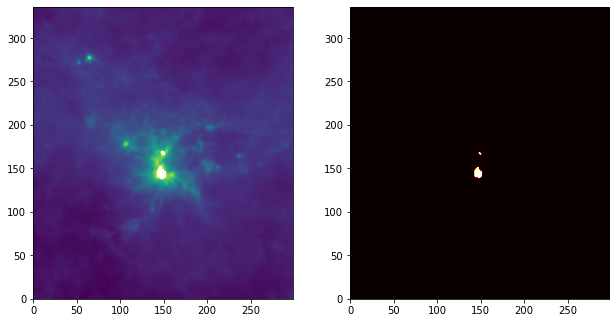

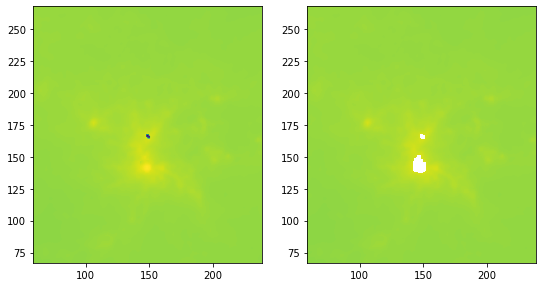

im250_sat_6_selected.fits :


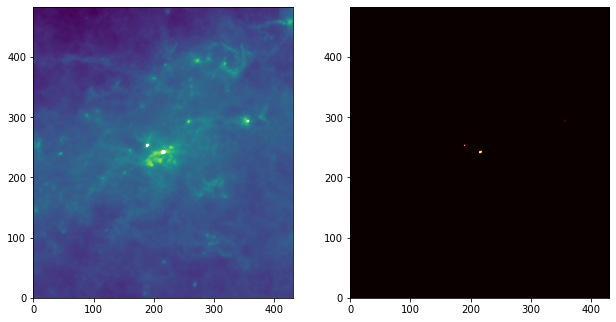

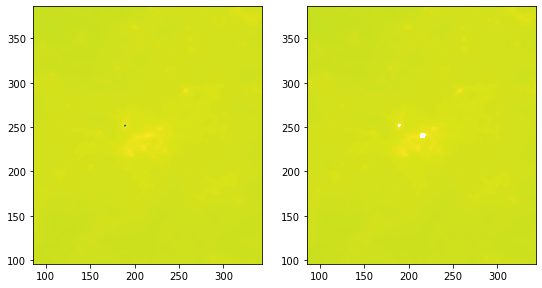

im250_sat_7_selected.fits :


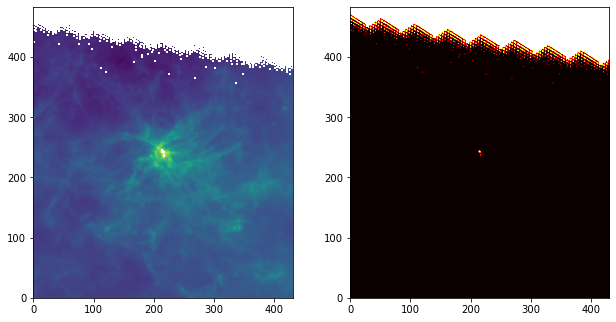

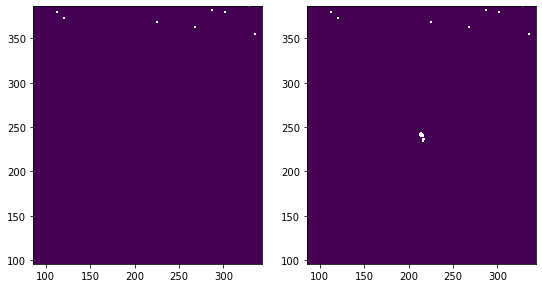

im250_sat_8_selected.fits :


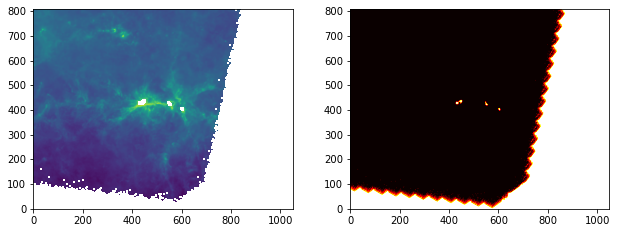

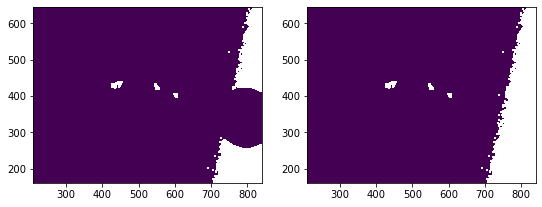

im350_sat_1_selected.fits :


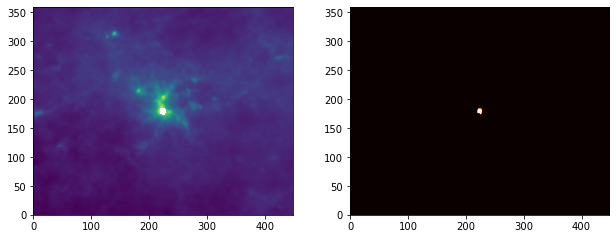

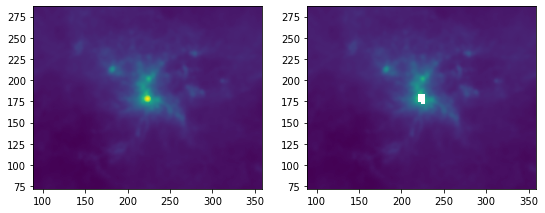

im350_sat_2_selected.fits :


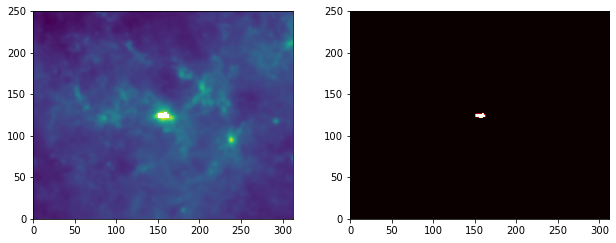

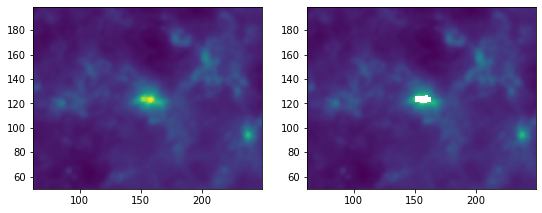

im350_sat_3_selected.fits :


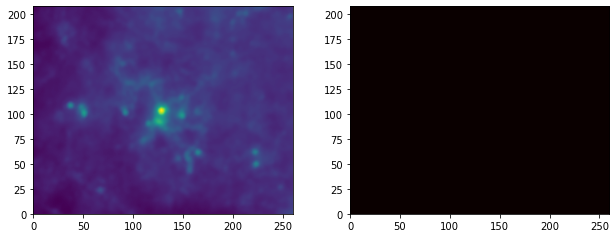

im350_sat_4_selected.fits :


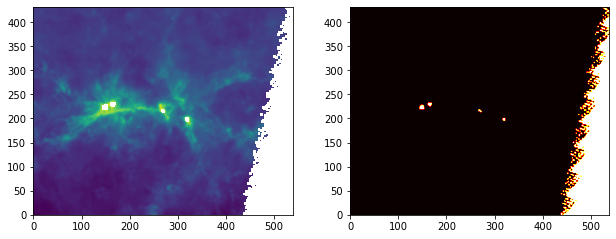

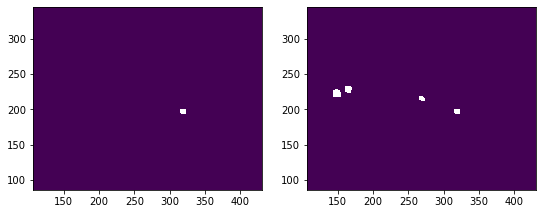

im350_sat_5_selected.fits :


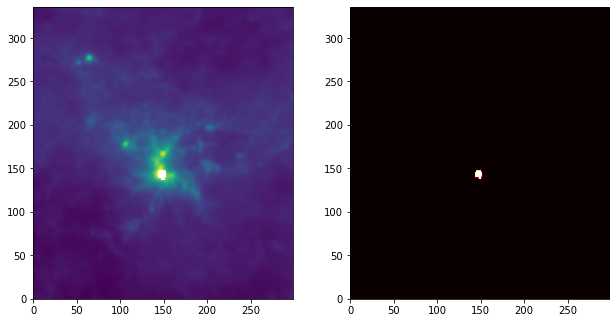

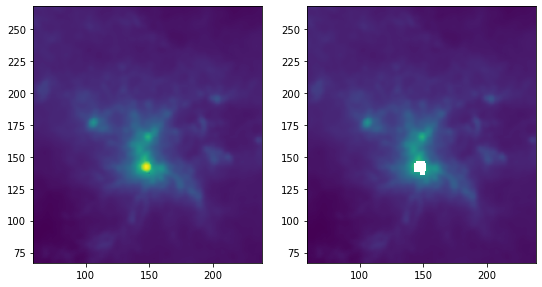

im350_sat_6_selected.fits :


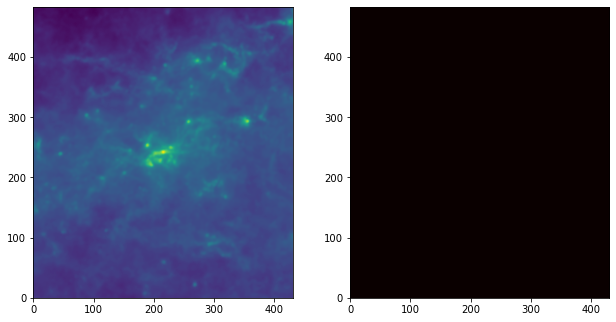

im350_sat_7_selected.fits :


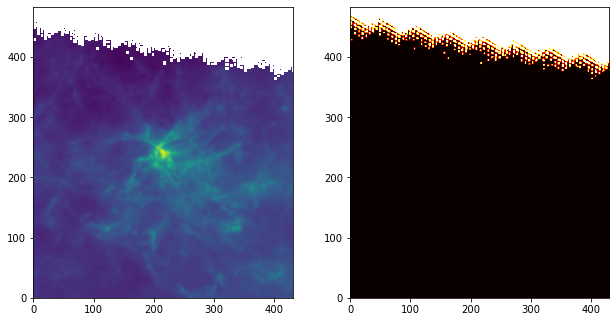

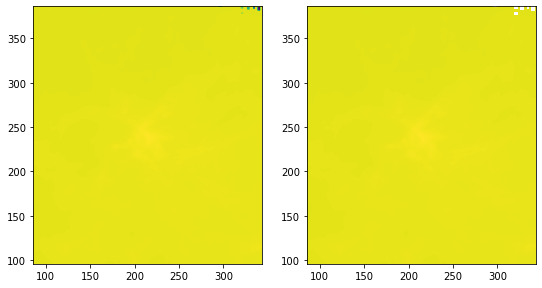

im350_sat_8_selected.fits :


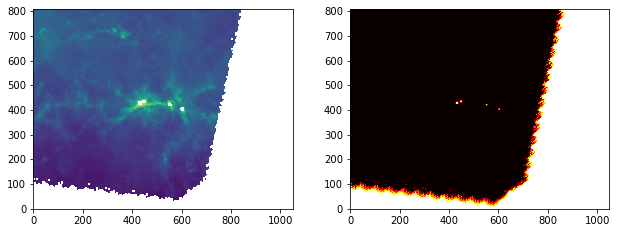

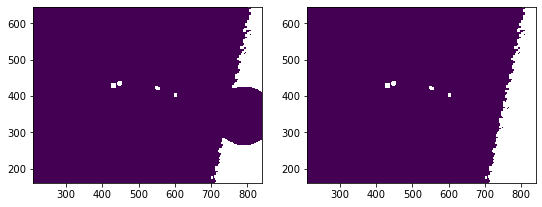

im500_sat_1_selected.fits :


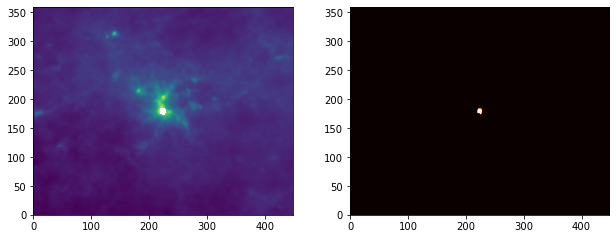

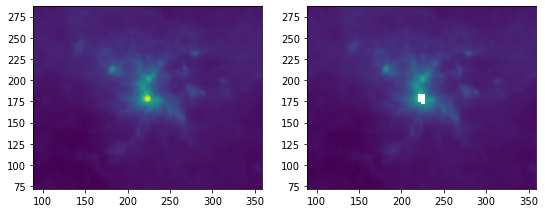

im500_sat_2_selected.fits :


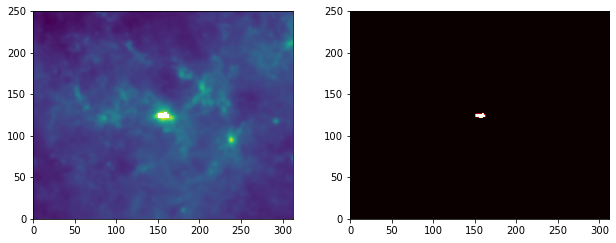

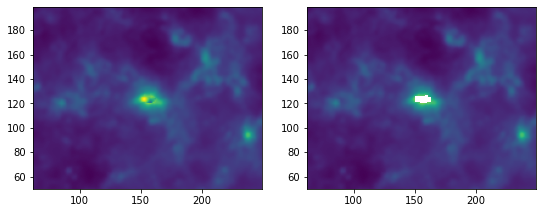

im500_sat_3_selected.fits :


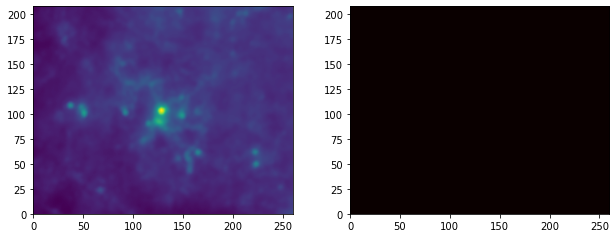

im500_sat_4_selected.fits :


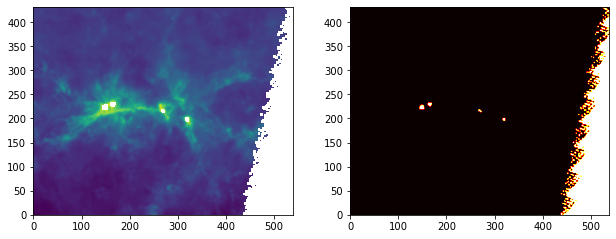

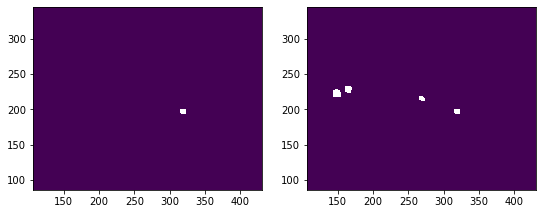

im500_sat_5_selected.fits :


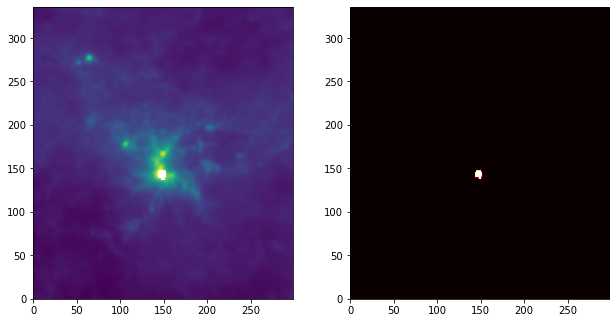

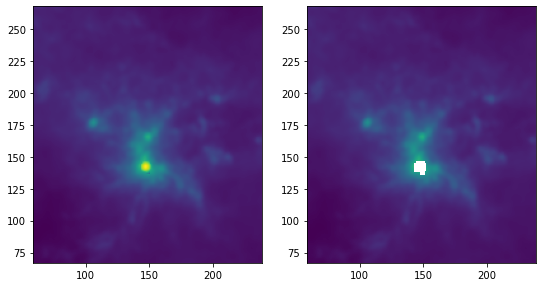

im500_sat_6_selected.fits :


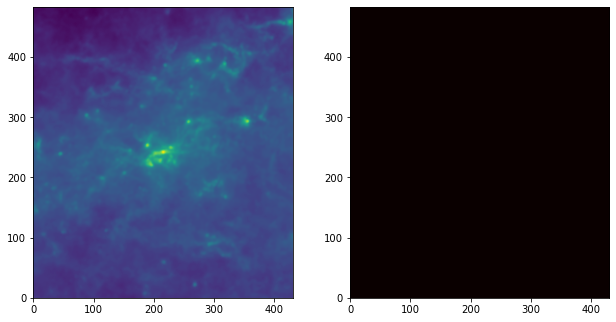

im500_sat_7_selected.fits :


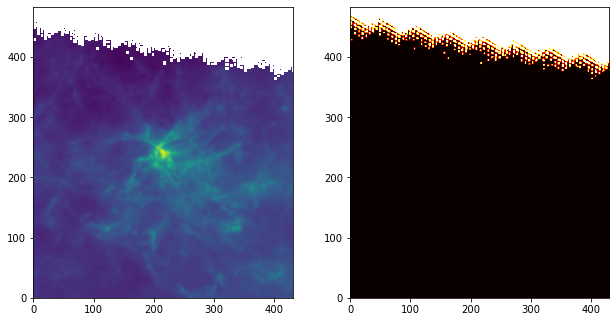

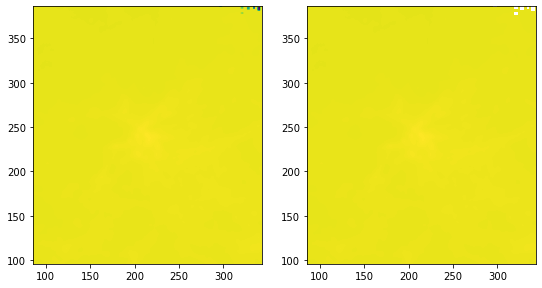

im500_sat_8_selected.fits :


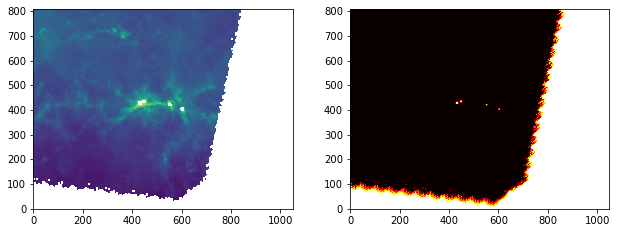

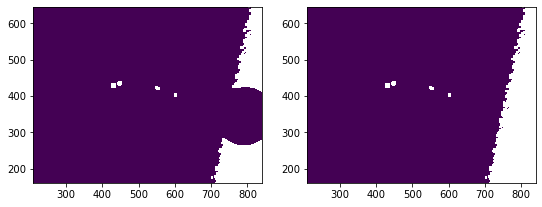

In [28]:
# import modules
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from hub_simulation import fit

# loop
files = os.listdir('../selected')
files.sort()

for index in range(len(files)-1):
    # open fits file
    hdu = fits.open('../selected/'+files[index+1])[0]
    header = hdu.header
    data = hdu.data
    data[data==0] = np.nan
    sat_area = np.zeros(data.shape,bool)
    sat_area[np.isnan(data)] = True

    # axis values from header
    x0,y0 = header['crpix1'],header['crpix2']
    dx,dy = header['cdelt1'],header['cdelt2']
    nx,ny = header['naxis1'],header['naxis2']
    x = np.arange(0,nx)#x0 + dx/abs(dx)*np.arange(0,nx)
    y = np.arange(0,ny)#y0 + dy/abs(dy)*np.arange(0,ny)
    grid = np.meshgrid(x,y)

    # plot and show image
    print(files[index+1],':')
    fig = plt.figure(figsize=(8,5*ny/nx))
    ax1 = plt.axes([0,0,0.45,1])
    ax2 = plt.axes([0.55,0,0.45,1])
    ax1.imshow(np.log10(data),origin='upper',extent=(x[0],x[-1],y[0],y[-1]))
    ax2.imshow(sat_area,origin='upper',extent=(x[0],x[-1],y[0],y[-1]),cmap='hot')
    plt.show()


    lim1 = 1*len(x)//5
    lim2 = 4*len(x)//5
    lim3 = 1*len(y)//5
    lim4 = 4*len(y)//5
    data = data[lim3:lim4,lim1:lim2]
    sat_area = sat_area[lim3:lim4,lim1:lim2]
    x = x[lim1:lim2]
    y = y[lim3:lim4]
    grid = np.meshgrid(x,y)
    
    if sat_area.any()==False:
        continue

    n_peaks = 3
    params,image = fit(grid,data,sat_area,peaks=n_peaks)

    #fits.writeto('sat_images_corrected/im250_sat_13_fixed.fits',image,header,overwrite=True)
    min_val,max_val = np.min(np.log10(image)),np.max(np.log10(image))

    fig,axs = plt.subplots(1,2,figsize=(9,5*ny/nx))
    ax1 = axs[0].imshow(np.log10(image),origin='upper',extent=(x[0],x[-1],y[0],y[-1]),vmin=min_val,vmax=max_val)
    ax2 = axs[1].imshow(np.log10(data),origin='upper',extent=(x[0],x[-1],y[0],y[-1]),vmin=min_val,vmax=max_val)
    #cax = plt.axes([1, 0.1, 0.01, 0.8])
    #for i in range(n_peaks):
        #axs[0].plot(params[i*3],params[i*3+1],'.')
    #for i in range(2):
    #   axs[i].set_xlim(lim1,lim2)
    #   axs[i].set_ylim(lim3,lim4)
    #plt.colorbar(ax1,cax=cax)
    plt.show()

In [ ]:
lim1 = 0
lim2 = None
data = data[lim1:lim2,lim1:lim2]
sat_area = sat_area[lim1:lim2,lim1:lim2]
x = x[lim1:lim2]
y = y[lim1:lim2]
grid = np.meshgrid(x,y)
fig = plt.figure(figsize=(30,15*ny/nx))
ax1 = plt.axes([0,0,0.45,1])
ax2 = plt.axes([0.55,0,0.45,1])
ax1.imshow(data,origin='lower',extent=(x[0],x[-1],y[0],y[-1]))
ax2.imshow(sat_area,origin='lower',extent=(x[0],x[-1],y[0],y[-1]))
plt.show()

n_peaks = 2

params,image = fit(grid,data,sat_area,peaks=n_peaks)
fits.writeto('sat_images_corrected/im250_sat_13_fixed.fits',image,header,overwrite=True)
min_val,max_val = np.min(np.log10(image)),np.max(np.log10(image))

fig,axs = plt.subplots(2,1,figsize=(15,15*ny/nx))
ax1 = axs[0].imshow(np.log10(image),origin='lower',extent=(x[0],x[-1],y[0],y[-1]),vmin=min_val,vmax=max_val)
ax2 = axs[1].imshow(np.log10(data),origin='lower',extent=(x[0],x[-1],y[0],y[-1]),vmin=min_val,vmax=max_val)
cax = plt.axes([0.7, 0.1, 0.01, 0.8])
for i in range(n_peaks):
    axs[0].plot(params[i*3],params[i*3+1],'.')
for i in range(2):
    axs[i].set_xlim(625,675)
    axs[i].set_ylim(-75,-125)
plt.colorbar(ax1,cax=cax)
plt.show()

im070_sat_2_selected.fits :


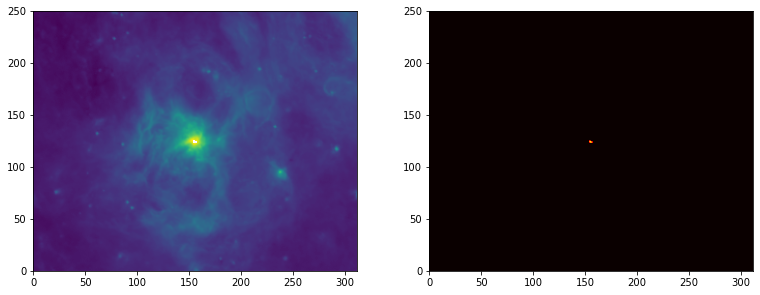

[140 170 110 140   1]


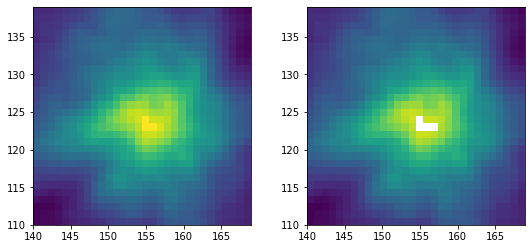

im160_sat_2_selected.fits :


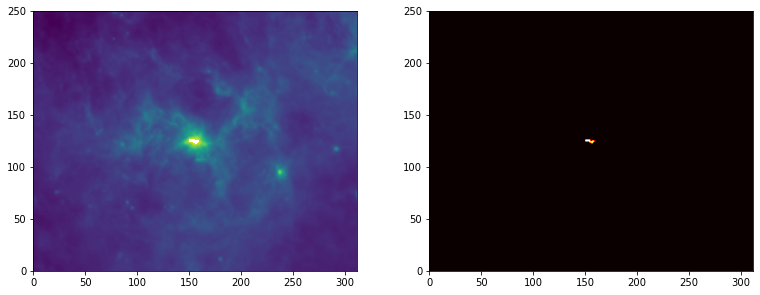

[140 170 110 140   2]


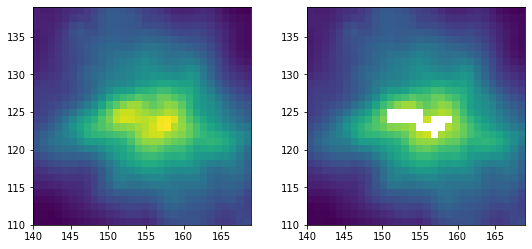

im250_sat_2_selected.fits :


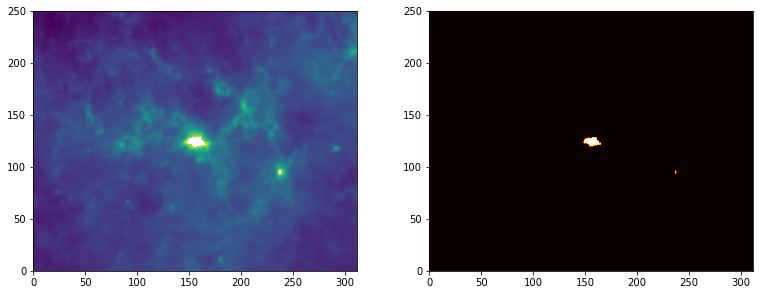

[140 170 110 140   3]


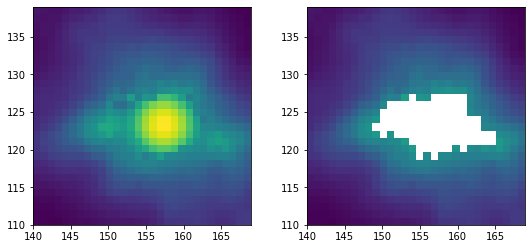

[200 300  50 150   1]


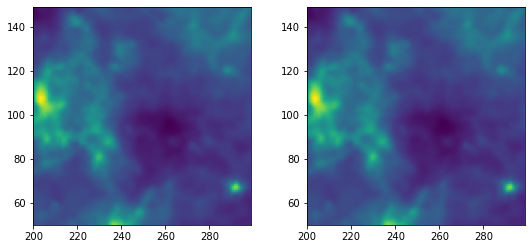

im350_sat_2_selected.fits :


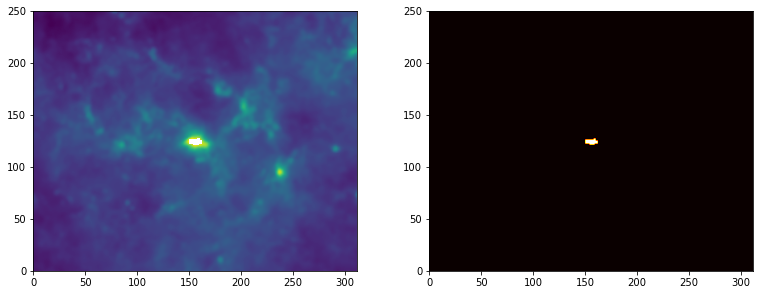

[140 170 110 140   3]


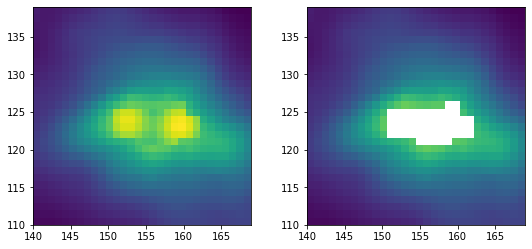

im500_sat_2_selected.fits :


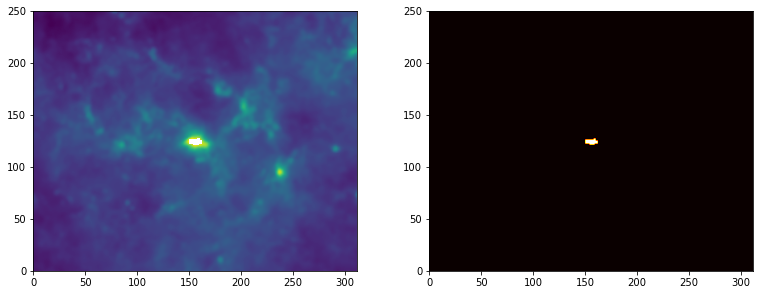

[140 170 110 140   3]


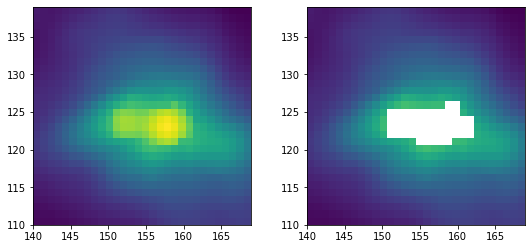

In [48]:
""" Correct second picture """

# Saturated pixel blobs at different wavelengths
sat_areas70  = np.array([[140,170,110,140,1]])
sat_areas160 = np.array([[140,170,110,140,2]])
sat_areas250 = np.array([[140,170,110,140,3],
                         [200,300,50,150,1]])
sat_areas350 = np.array([[140,170,110,140,3]])
sat_areas500 = np.array([[140,170,110,140,3]])

sat_area_list = [sat_areas70,sat_areas160,sat_areas250,sat_areas350,sat_areas500]

# loop
files = os.listdir('../selected')
files.sort()

current_wavelength = 0
for index in range(2,len(files),8):
    # open fits file
    hdu = fits.open('../selected/'+files[index])[0]
    header = hdu.header
    data = hdu.data
    #data[data==0] = np.nan
    sat_area = np.zeros(data.shape,bool)
    sat_area[np.isnan(data)] = True

    # axis values from header
    x0,y0 = header['crpix1'],header['crpix2']
    dx,dy = header['cdelt1'],header['cdelt2']
    nx,ny = header['naxis1'],header['naxis2']
    x = np.arange(0,nx)#x0 + dx/abs(dx)*np.arange(0,nx)
    y = np.arange(0,ny)#y0 + dy/abs(dy)*np.arange(0,ny)
    grid = np.meshgrid(x,y)

    # plot and show image
    print(files[index],':')
    fig = plt.figure(figsize=(10,10*ny/nx))
    ax1 = plt.axes([0,0,0.45,1])
    ax2 = plt.axes([0.55,0,0.45,1])
    ax1.imshow(np.log10(data),origin='upper',extent=(x[0],x[-1],y[0],y[-1]))
    ax2.imshow(sat_area,origin='upper',extent=(x[0],x[-1],y[0],y[-1]),cmap='hot')
    plt.show()

    
    for lims in sat_area_list[current_wavelength]:
        print(lims)
        lim1,lim2,lim3,lim4,n_peaks = lims
        data_sub = data[lim3:lim4,lim1:lim2].copy()
        sat_area_sub = sat_area[lim3:lim4,lim1:lim2].copy()
        x_sub = x[lim1:lim2].copy()
        y_sub = y[lim3:lim4].copy()
        grid_sub = np.meshgrid(x_sub,y_sub)
    
        if sat_area.any()==False:
            continue

        params,image_sub = fit(grid_sub,data_sub,sat_area_sub,peaks=n_peaks)

        #fits.writeto('sat_images_corrected/im250_sat_13_fixed.fits',image,header,overwrite=True)
        min_val,max_val = np.min(np.log10(image_sub)),np.max(np.log10(image_sub))
        extent_vals = (x_sub[0],x_sub[-1],y_sub[0],y_sub[-1])
        fig,axs = plt.subplots(1,2,figsize=(9,5*ny/nx))
        ax1 = axs[0].imshow(np.log10(image_sub),origin='upper',extent=extent_vals,vmin=min_val,vmax=max_val)
        ax2 = axs[1].imshow(np.log10(data_sub),origin='upper',extent=extent_vals,vmin=min_val,vmax=max_val)
        #cax = plt.axes([1, 0.1, 0.01, 0.8])
        #for i in range(n_peaks):
            #axs[0].plot(params[i*3],params[i*3+1],'.')
        #for i in range(2):
        #   axs[i].set_xlim(lim1,lim2)
        #   axs[i].set_ylim(lim3,lim4)
        #plt.colorbar(ax1,cax=cax)
        plt.show()
    current_wavelength += 1